# GRIPAUGUST21 @ The Sparks Foundation

## Author : Cheekireddy Dhamini

## Color Identification in Images

## Task - 2

### Implement an image color detector which identifies all the colors in an image or vedio

##### Importing the packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76
import cv2
import os
%matplotlib inline

##### Reading the image

In [2]:
image = cv2.imread('colorpic.jpg')
image

array([[[118,  35,  20],
        [117,  34,  19],
        [114,  32,  20],
        ...,
        [ 49,  73,  19],
        [ 50,  73,  19],
        [ 50,  73,  19]],

       [[117,  34,  19],
        [117,  34,  19],
        [115,  34,  19],
        ...,
        [ 53,  78,  20],
        [ 54,  79,  21],
        [ 55,  80,  22]],

       [[117,  37,  20],
        [117,  37,  20],
        [116,  35,  20],
        ...,
        [ 50,  81,  12],
        [ 49,  80,  11],
        [ 48,  79,  10]],

       ...,

       [[118, 123, 122],
        [119, 124, 123],
        [120, 124, 125],
        ...,
        [ 38,  32,  33],
        [ 38,  30,  31],
        [ 36,  28,  29]],

       [[119, 124, 123],
        [119, 124, 123],
        [120, 124, 125],
        ...,
        [ 40,  34,  35],
        [ 40,  32,  33],
        [ 39,  31,  32]],

       [[119, 124, 123],
        [119, 124, 123],
        [120, 124, 125],
        ...,
        [ 40,  35,  36],
        [ 42,  34,  35],
        [ 41,  33,  34]]

##### Type of the image

In [3]:
#printing the type of the image
print("The type of the image is ", type(image))

The type of the image is  <class 'numpy.ndarray'>


In [4]:
#displaying the size of the image
print("shape ", image.shape)

shape  (662, 1000, 3)


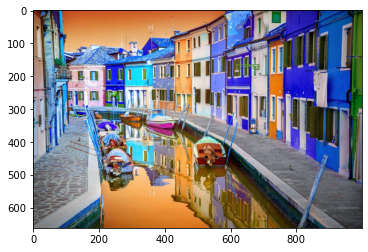

In [5]:
#Displaying the image
plt.imshow(image)

##### As we know that by default opencv reads the image in the BGR form sequence. To view the original image we need to convert the image from BGR sequence to RGB sequence 

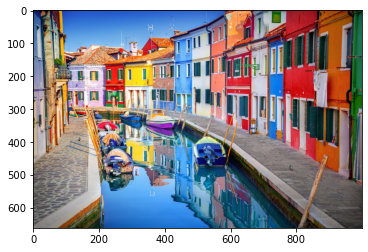

In [6]:
# Printing the original image by convertion of the seqences
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

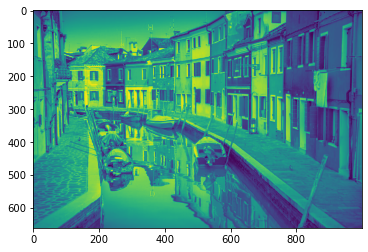

In [7]:
# We can also change the image to grey by changing the sequence from BGR to GRAY
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_image)

### Color Indentification

##### Convertion of RGB to HEX by using lables

In [8]:
#Converting the RGB seqence to HEX sequence
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
#Reading the image in RGB color space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

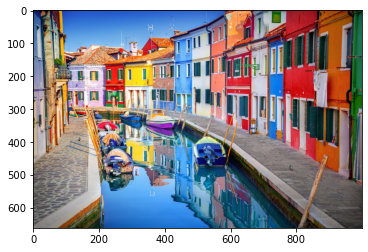

In [10]:
#Displaying the original image
image = get_image('colorpic.jpg')
plt.imshow(image)

In [11]:
# Defining a function get_colors to extract top colors from image and displaying in pie chart
def get_colors(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (1000, 800), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    lables = clf.fit_predict(modified_image)
    counts = Counter(lables)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    return rgb_colors

[array([30.56802896, 53.39487393, 56.09716727]),
 array([178.77785213,  52.59639791,  28.69157283]),
 array([ 45.31604091, 114.53625667, 196.66108715]),
 array([210.98197093, 206.45654291, 207.5095437 ]),
 array([228.43608107, 157.83306877,  84.06013511]),
 array([162.14066574, 150.56864012, 149.86097643]),
 array([109.06218411, 101.80850243, 102.73934472]),
 array([101.58692441, 167.71573883, 230.89266872])]

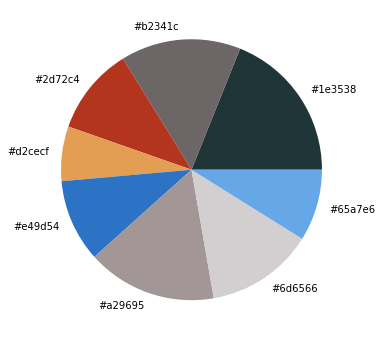

In [12]:
#Displaying the pie chart with top 8 colors in the image
get_colors(get_image('colorpic.jpg'), 8, True)

In [13]:
# Defing the path for the images for searching the color
IMAGE_DIRECTORY= "F:\images"
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [128, 0, 0],
    'BLACK': [0, 0, 0]
}
images = []
for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

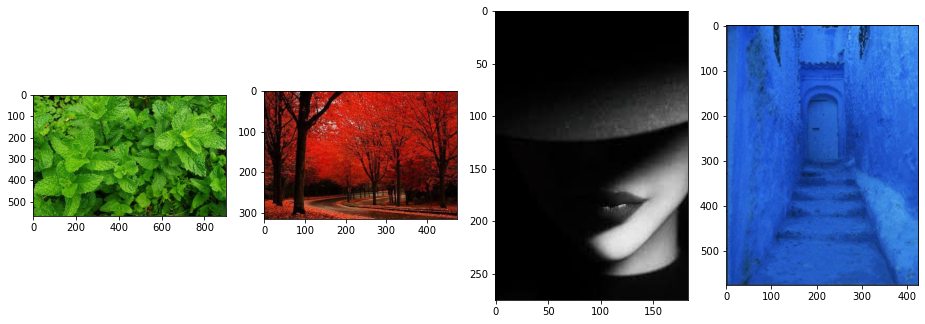

In [14]:
# Displaying the images using loop
plt.figure(figsize=(20, 10))
for i in range (len(images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])

In [15]:
#Matching images with 10 colors by defining a function names match_image_by_color, which filters all the images that matches
#with the searched color
def match_image_by_color(image, color, threshold=60, number_of_colors = 10):
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    return select_image

In [16]:
# Showing selected images with the help of show_selected _images function which iterates over all images 
def show_selected_images(images, color, threshold, colors_to_match):
    index=1
    for i in range(len(images)):
        selected = match_image_by_color(images[i], color, threshold, colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index+=1

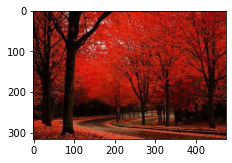

In [17]:
#Searching for the color RED from the selected images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

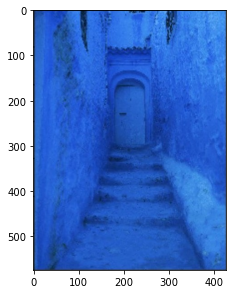

In [18]:
#Searching for the color BLUE from the selected images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

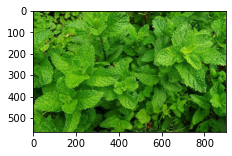

In [20]:
#Searching for the color GREEN from the selected images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

## Conclusion:
### Finally all the colors were extracted from an image using KMeans algorithm and then used this algorithm for the search of images based on the colors.

## Thank You !!